In [1]:
import pandas as pd

df = pd.read_csv('https://github.com/renatapink/DSdegree/raw/master/Modulo2/Aula09/BVSP2.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,variacao,var_dia,day_name,month_name,dia,mes,ano
0,2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400.0,-466.0,negativa,Monday,January,4,1,2021
1,2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100.0,388.0,positiva,Tuesday,January,5,1,2021
2,2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200.0,474.0,positiva,Wednesday,January,6,1,2021
3,2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800.0,2853.0,positiva,Thursday,January,7,1,2021
4,2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800.0,2690.0,positiva,Friday,January,8,1,2021


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        148 non-null    object 
 1   Open        147 non-null    float64
 2   High        147 non-null    float64
 3   Low         147 non-null    float64
 4   Close       147 non-null    float64
 5   Adj Close   147 non-null    float64
 6   Volume      147 non-null    float64
 7   variacao    147 non-null    float64
 8   var_dia     147 non-null    object 
 9   day_name    148 non-null    object 
 10  month_name  148 non-null    object 
 11  dia         148 non-null    int64  
 12  mes         148 non-null    int64  
 13  ano         148 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 16.3+ KB


In [33]:
import datetime as dt

# transformar a coluna Date em datetime
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        148 non-null    datetime64[ns]
 1   Open        147 non-null    float64       
 2   High        147 non-null    float64       
 3   Low         147 non-null    float64       
 4   Close       147 non-null    float64       
 5   Adj Close   147 non-null    float64       
 6   Volume      147 non-null    float64       
 7   variacao    147 non-null    float64       
 8   var_dia     147 non-null    object        
 9   day_name    148 non-null    object        
 10  month_name  148 non-null    object        
 11  dia         148 non-null    int64         
 12  mes         148 non-null    int64         
 13  ano         148 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 16.3+ KB


In [3]:
import matplotlib.pyplot as plt

O Pandas funciona em cima do matplotlib para fazer os gráficos

<AxesSubplot:>

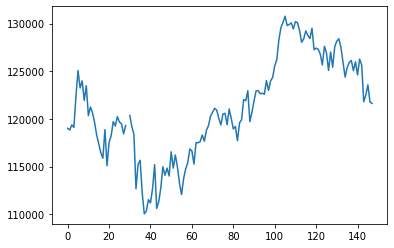

In [19]:
df['Open'].plot(kind='line') #ou df['Open'].plot.line()

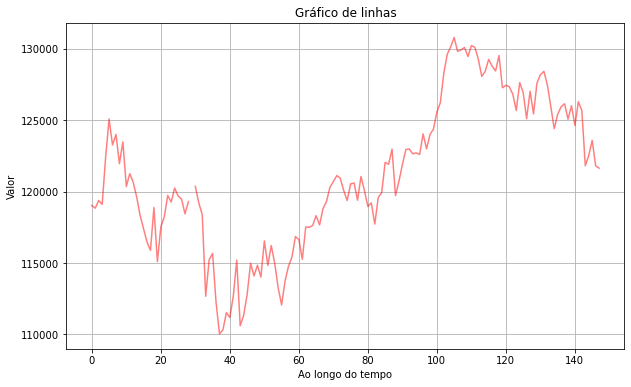

In [14]:
df['Open'].plot(color='r', grid=True, alpha=0.5, figsize=(10,6), title='Gráfico de linhas') #aplha - transparência
plt.xlabel('Ao longo do tempo')
plt.ylabel('Valor')
plt.show()

<AxesSubplot:xlabel='Open', ylabel='Close'>

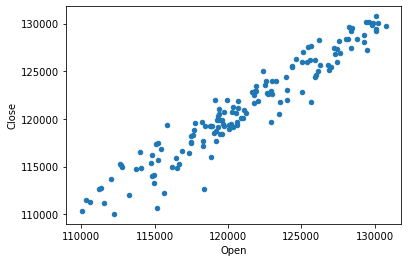

In [16]:
df.plot(kind='scatter', x='Open', y='Close')

<AxesSubplot:ylabel='Frequency'>

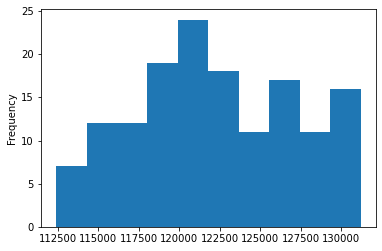

In [17]:
df['High'].plot(kind='hist', x='Open', y='Close') # ou df['High'].hist()

<AxesSubplot:>

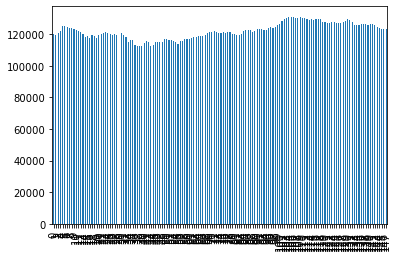

In [21]:
df['High'].plot.bar() # ou df['High'].plot(kind='bar)

<AxesSubplot:>

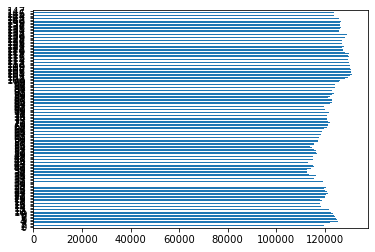

In [22]:
df['High'].plot.barh() # ou df['High'].plot(kind='barh)

<AxesSubplot:>

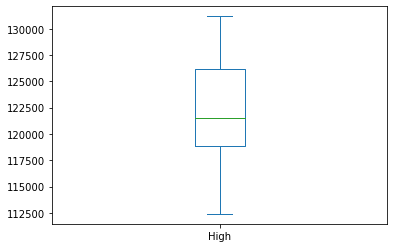

In [23]:
df['High'].plot.box()

<AxesSubplot:ylabel='month_name'>

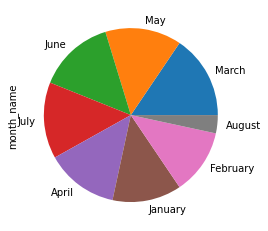

In [25]:
df['month_name'].value_counts().plot.pie()

<AxesSubplot:>

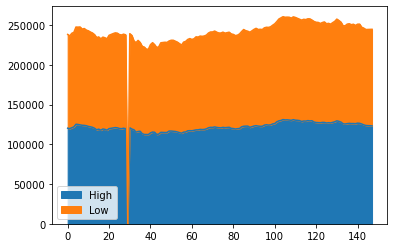

In [27]:
df[['High','Low']].plot.area()

<AxesSubplot:ylabel='Density'>

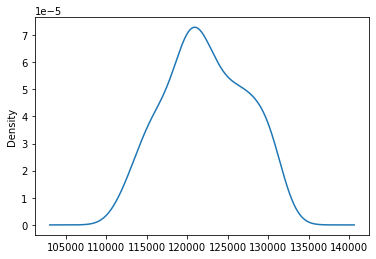

In [29]:
df['High'].plot.density()

<AxesSubplot:xlabel='Open', ylabel='Close'>

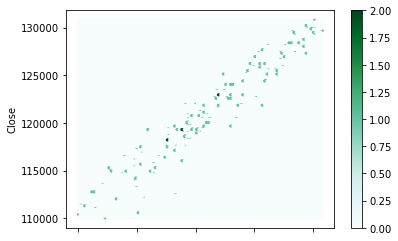

In [30]:
df.plot.hexbin('Open','Close')

Voltando para o gráfico de dispersão

<AxesSubplot:title={'center':'Gráfico de fechamento da bolsa ao longo do tempo'}, xlabel='Date', ylabel='Close'>

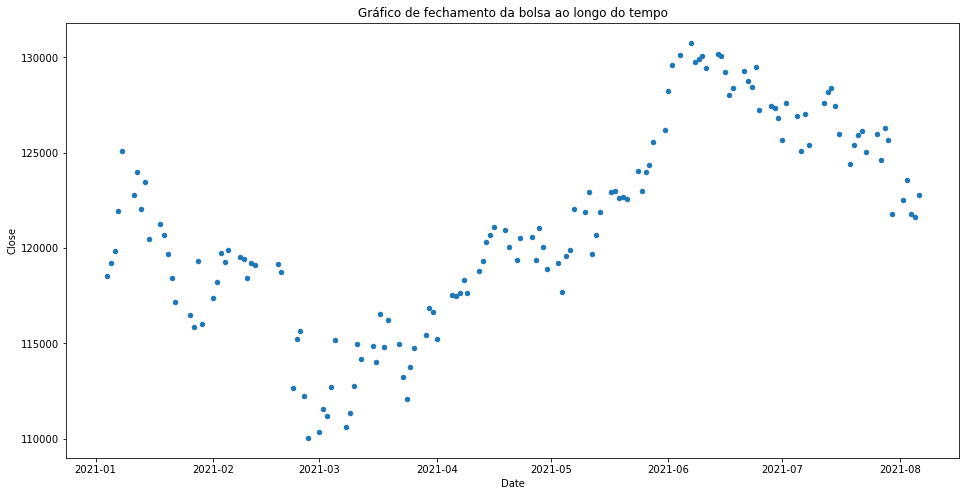

In [37]:
df.plot(kind='scatter', x='Date', y='Close', figsize=(16,8), title='Gráfico de fechamento da bolsa ao longo do tempo')


Filtrou os dados e logo após fizemos o gráfico

<AxesSubplot:title={'center':'Gráfico de fechamento da bolsa ao longo do tempo'}, xlabel='Date', ylabel='Close'>

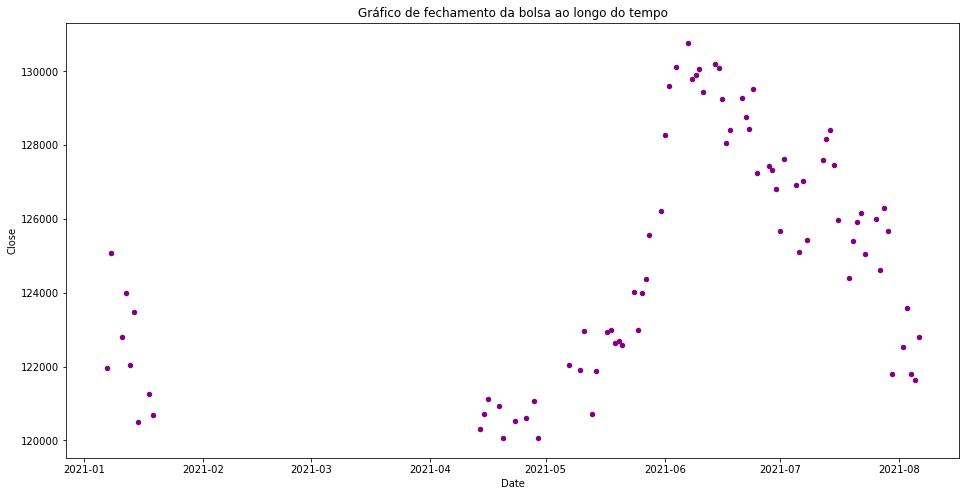

In [44]:
# gráfico com os dados acima de fechamento de 120k
df.loc[df['Close'] > 120000].plot(kind='scatter', x='Date', y='Close',color='purple' ,figsize=(16,8), title='Gráfico de fechamento da bolsa ao longo do tempo')


Dois gráficos sobrepostos

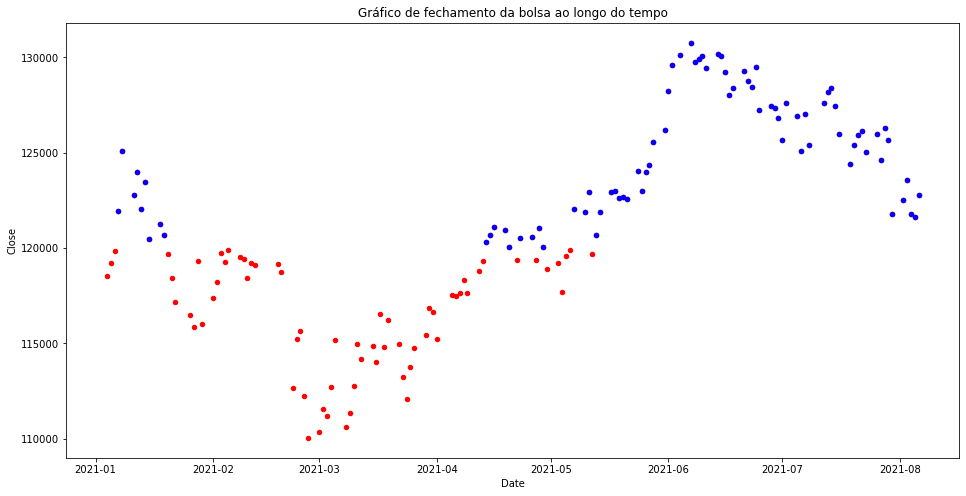

In [54]:
ax = df.plot(kind='scatter', x='Date', y='Close',color='red', figsize=(16,8), title='Gráfico de fechamento da bolsa ao longo do tempo')
df.loc[df['Close'] > 120000].plot(kind='scatter', x='Date', y='Close',color='blue' ,figsize=(16,8), title='Gráfico de fechamento da bolsa ao longo do tempo', ax=ax)
plt.show()

# Bonus

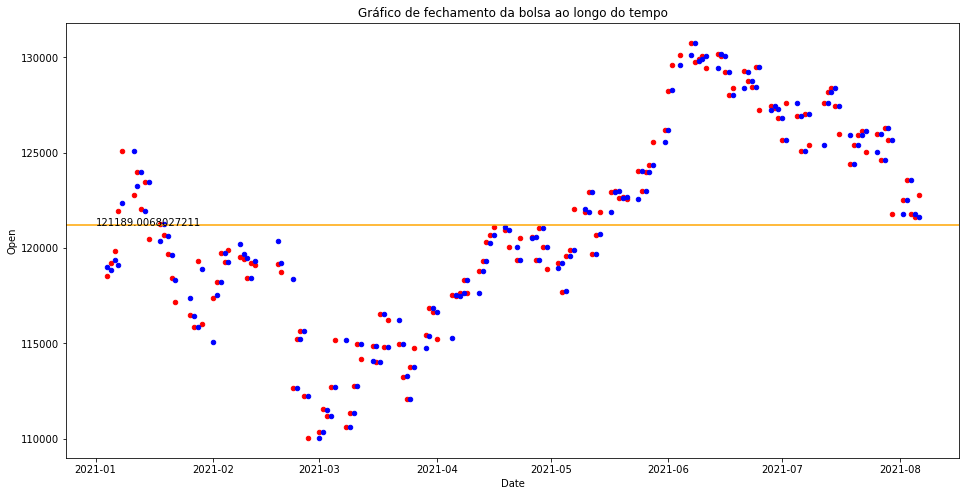

In [68]:
ax = df.plot(kind='scatter', x='Date', y='Close',color='red', figsize=(16,8), title='Gráfico de fechamento da bolsa ao longo do tempo')
df.plot(kind='scatter', x='Date', y='Open',color='blue' ,figsize=(16,8), title='Gráfico de fechamento da bolsa ao longo do tempo', ax=ax)
plt.axhline(df['Close'].mean(), color='orange')
#anotação com o calor da média do fechamento
ax.annotate(df['Close'].mean(), (pd.to_datetime('2021-01-01'),df['Close'].mean()))
plt.show()

No Matplotlib:

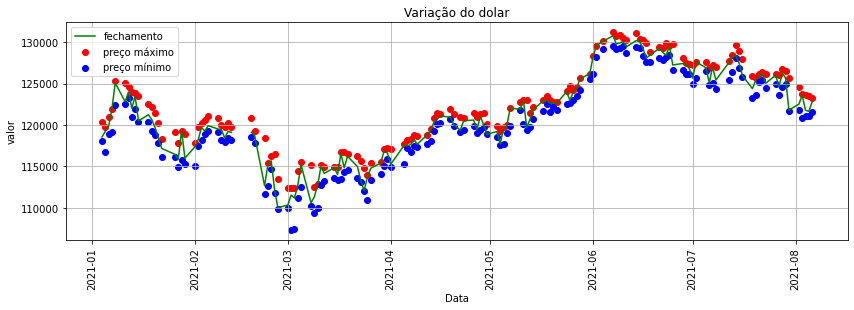

In [70]:
plt.figure(figsize=(14,4))
plt.scatter('Date','High', data=df, c='r')
plt.scatter('Date','Low', data=df, c='b')
plt.plot('Date','Close', data=df, c='green')
plt.grid()

plt.title('Variação do dolar')
plt.xlabel('Data')
plt.ylabel('valor')
plt.xticks(rotation=90)

plt.legend(['fechamento', 'preço máximo', 'preço mínimo'])

plt.show()